[[[173 154 137]
  [174 155 138]
  [175 156 139]
  ...
  [189 171 149]
  [190 172 150]
  [192 174 152]]

 [[170 151 134]
  [172 153 136]
  [174 155 138]
  ...
  [192 174 152]
  [189 171 149]
  [181 163 141]]

 [[169 150 133]
  [171 152 135]
  [173 154 137]
  ...
  [197 179 157]
  [189 171 149]
  [177 159 137]]

 ...

 [[ 86  71  52]
  [106  91  72]
  [ 91  74  56]
  ...
  [ 23  22  20]
  [ 13  12  10]
  [ 11  10   8]]

 [[ 84  69  48]
  [ 99  84  63]
  [ 88  71  53]
  ...
  [ 51  50  48]
  [ 29  28  26]
  [ 14  13  11]]

 [[ 72  57  36]
  [ 94  79  58]
  [116  99  81]
  ...
  [ 75  74  72]
  [ 48  47  45]
  [ 26  25  23]]]


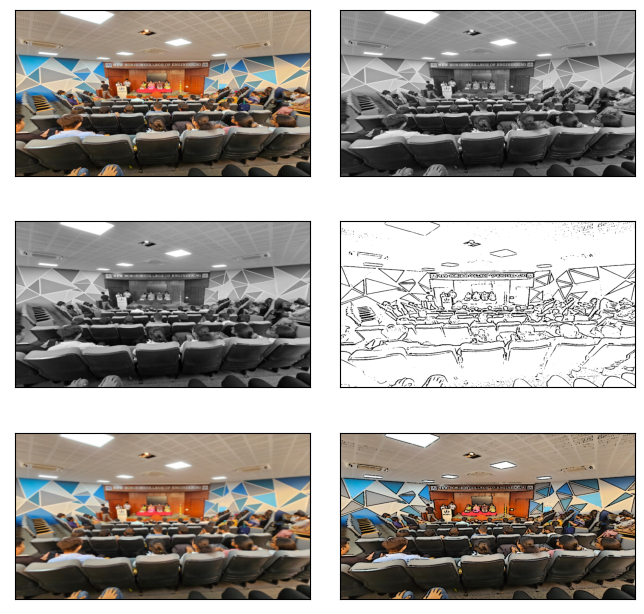

In [1]:
import tkinter as tk  
from tkinter import *
import easygui  
import cv2  
import matplotlib.pyplot as plt

import os  
import sys  

# Making the GUI main window 
top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='blue')
label = Label(top, background='#CDCDCD', font=('calibri', 20, 'bold'))


def upload():
    image_path = easygui.fileopenbox()
    cartoonify(image_path)



def cartoonify(image_path):
    
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    print(original_image) 

    
    if original_image is None:
        print("Can't find any image. Choose appropriate file")
        sys.exit()
    resize_image1 = cv2.resize(original_image, (960, 540))
    

   
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    resize_image2 = cv2.resize(grayscale_image, (960, 540))
    

    
    smooth_grayscale_image = cv2.medianBlur(grayscale_image, 5)
    resize_image3 = cv2.resize(smooth_grayscale_image, (960, 540))
    

    
    get_edge = cv2.adaptiveThreshold(smooth_grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    resize_image4 = cv2.resize(get_edge, (960, 540))

    color_image = cv2.bilateralFilter(original_image, 9, 300, 300)
    resize_image5 = cv2.resize(color_image, (960, 540))
    
    cartoon_image = cv2.bitwise_and(color_image, color_image, mask=get_edge)
    resize_image6 = cv2.resize(cartoon_image, (960, 540))

    images = [resize_image1, resize_image2, resize_image3, resize_image4, resize_image5, resize_image6]
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    savel = Button(top, text="Save cartoon image", command=lambda: save(resize_image6, image_path), padx=30, pady=5)
    savel.configure(background='#364156', foreground='white', font=('calibri', 10, 'bold'))
    savel.pack(side=TOP, pady=50)


    plt.show()


def save(resize_image6, image_path):
   
    new_name = "cartoonified_Image"
    path1 = os.path.dirname(image_path)
    extension = os.path.splitext(image_path)[1]
    path = os.path.join(path1, new_name + extension)
    cv2.imwrite(path, cv2.cvtColor(resize_image6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + new_name + " at " + path
    tk.messagebox.showinfo(title=None, message=I)



upload = Button(top, text="Cartoonify an Image", command=upload, padx=10, pady=5)
upload.configure(background="#374256", foreground="wheat", font=('calibri', 10, 'bold'))
upload.pack(side=TOP, pady=50)


top.mainloop()